In [0]:
from google.colab import files

from IPython.display import Image

In [0]:
#install the dependencies
!pip install kaggle

In [0]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mariahbanu","key":"f0d15403fce75ff4c527fd309cf5b33f"}'}

In [0]:
!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c aptos2019-blindness-detection

100% 8.01G/8.01G [01:09<00:00, 108MB/s]
100% 8.01G/8.01G [01:09<00:00, 123MB/s]
 99% 1.48G/1.50G [00:13<00:00, 109MB/s]
100% 1.50G/1.50G [00:14<00:00, 114MB/s]
  0% 0.00/53.7k [00:00<?, ?B/s]
100% 53.7k/53.7k [00:00<00:00, 59.7MB/s]
  0% 0.00/24.5k [00:00<?, ?B/s]
100% 24.5k/24.5k [00:00<00:00, 21.3MB/s]
  0% 0.00/28.3k [00:00<?, ?B/s]
100% 28.3k/28.3k [00:00<00:00, 28.5MB/s]


In [0]:
from zipfile import ZipFile
file_name = "train_images.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [0]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [0]:
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array

In [0]:
from os.path import join


retina_df = pd.read_csv('train.csv')
retina_df.head(5)

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


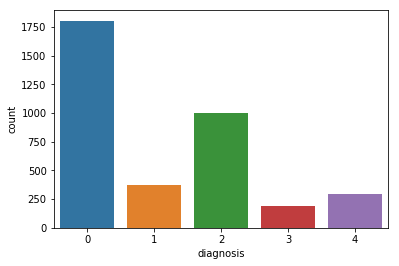

In [0]:
import seaborn as sns

sns.countplot(retina_df.diagnosis)

In [0]:
retina_df['id_code']=retina_df['id_code'].apply(lambda x: x+'.png')

In [0]:
one = retina_df.loc[retina_df['diagnosis']==1]

In [0]:
two = retina_df.loc[retina_df['diagnosis']==2]

In [0]:
three = retina_df.loc[retina_df['diagnosis']==3]

In [0]:
four = retina_df.loc[retina_df['diagnosis']==4]

In [0]:
four = pd.concat([four]*5, ignore_index=True)

In [0]:
three = pd.concat([three]*8, ignore_index=True)

In [0]:
two = pd.concat([two]*1, ignore_index=True)

In [0]:
one = pd.concat([one]*4, ignore_index=True)

In [0]:
x = pd.concat([retina_df,four,three,two,one], ignore_index=True)

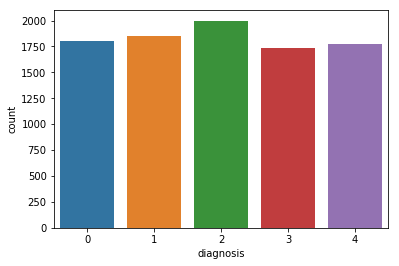

In [0]:

sns.countplot(x.diagnosis)

In [0]:
y=x.diagnosis

In [0]:
y

0       2
1       4
2       1
3       0
4       0
5       4
6       0
7       2
8       2
9       1
10      0
11      2
12      0
13      3
14      1
15      0
16      2
17      0
18      0
19      2
20      2
21      0
22      1
23      2
24      0
25      2
26      0
27      0
28      0
29      0
       ..
9130    1
9131    1
9132    1
9133    1
9134    1
9135    1
9136    1
9137    1
9138    1
9139    1
9140    1
9141    1
9142    1
9143    1
9144    1
9145    1
9146    1
9147    1
9148    1
9149    1
9150    1
9151    1
9152    1
9153    1
9154    1
9155    1
9156    1
9157    1
9158    1
9159    1
Name: diagnosis, Length: 9160, dtype: int64

In [0]:
img=x['id_code']

In [0]:
list(img)

['000c1434d8d7.png',
 '001639a390f0.png',
 '0024cdab0c1e.png',
 '002c21358ce6.png',
 '005b95c28852.png',
 '0083ee8054ee.png',
 '0097f532ac9f.png',
 '00a8624548a9.png',
 '00b74780d31d.png',
 '00cb6555d108.png',
 '00cc2b75cddd.png',
 '00e4ddff966a.png',
 '00f6c1be5a33.png',
 '0104b032c141.png',
 '0124dffecf29.png',
 '0125fbd2e791.png',
 '012a242ac6ff.png',
 '014508ccb9cb.png',
 '0151781fe50b.png',
 '0161338f53cc.png',
 '0180bfa26c0b.png',
 '0182152c50de.png',
 '01b3aed3ed4c.png',
 '01c7808d901d.png',
 '01d9477b1171.png',
 '01eb826f6467.png',
 '01f7bb8be950.png',
 '0212dd31f623.png',
 '022f820027b8.png',
 '0231642cf1c2.png',
 '0232dfea7547.png',
 '02358b47ea89.png',
 '0243404e8a00.png',
 '025a169a0bb0.png',
 '02685f13cefd.png',
 '026dcd9af143.png',
 '02cd34a85b24.png',
 '02da652c74b8.png',
 '02dda30d3acf.png',
 '0304bedad8fe.png',
 '0318598cfd16.png',
 '032d7b0b4bf6.png',
 '033f2b43de6d.png',
 '034cb07a550f.png',
 '03676c71ed1b.png',
 '0369f3efe69b.png',
 '03747397839f.png',
 '03a7f4a5786

In [0]:
from os.path import join

image_dir = ''
img_paths = [join(image_dir, filename) for filename in img]

In [0]:
import cv2

img_paths[0]

'000c1434d8d7.png'

In [0]:
'''def read_and_prep_images(img_paths):    
  img_array = np.array([cv2.cvtColor((cv2.resize((cv2.imread(img)),(480,480))),cv2.COLOR_BGR2GRAY) for img in img_paths])
  return img_array
'''
def read_and_prep_images(img_paths):
  img_array=np.array([cv2.addWeighted ((cv2.cvtColor((cv2.resize((cv2.imread(img)),(480,480))),cv2.COLOR_BGR2GRAY)),4, cv2.GaussianBlur((cv2.cvtColor((cv2.resize((cv2.imread(img)),(480,480))),cv2.COLOR_BGR2GRAY)), (0,0),480/10) ,-4 ,128) for img in img_paths])
  return img_array



In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(img_paths,y,test_size=0.20)

In [0]:
x_train = read_and_prep_images(x_train)


In [0]:
x_test = read_and_prep_images(x_test)


In [0]:
x_train=x_train/255
x_test=x_test/255

In [0]:
y_train.shape

(7328,)

In [0]:
x_train.shape

(7328, 480, 480)

In [0]:
x_test.shape

(1832, 480, 480)

In [0]:
x_train=np.reshape(x_train, (7328,480,480,1))
x_train.shape

(7328, 480, 480, 1)

In [0]:
x_test=np.reshape(x_test, (1832,480,480,1))
x_test.shape

(1832, 480, 480, 1)




'''
model = Sequential()
model.add(Flatten(input_shape=[480,480]))
model.add(Dense(100, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(5, activation="softmax"))
'''

In [0]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation, MaxPooling2D, Conv2D, Dropout


model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(480, 480, 1)),
    MaxPooling2D(4, 4),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(4,4),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(4,4),
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(4,4),
    Dropout(0.5),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')
])

In [0]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam",
              metrics=["accuracy"])

In [0]:
model.fit(x_train, y_train,epochs=15,batch_size=80)

Epoch 1/15
7328/7328 [==============================] - 51s 7ms/step - loss: 1.3200 - acc: 0.4210
Epoch 2/15
7328/7328 [==============================] - 49s 7ms/step - loss: 1.1504 - acc: 0.5176
Epoch 3/15
7328/7328 [==============================] - 49s 7ms/step - loss: 1.0620 - acc: 0.5590
Epoch 4/15
7328/7328 [==============================] - 49s 7ms/step - loss: 0.9769 - acc: 0.5970
Epoch 5/15
7328/7328 [==============================] - 49s 7ms/step - loss: 0.8903 - acc: 0.6382
Epoch 6/15
7328/7328 [==============================] - 49s 7ms/step - loss: 0.7658 - acc: 0.6953
Epoch 7/15
7328/7328 [==============================] - 49s 7ms/step - loss: 0.6410 - acc: 0.7535
Epoch 8/15
7328/7328 [==============================] - 49s 7ms/step - loss: 0.5232 - acc: 0.8020
Epoch 9/15
7328/7328 [==============================] - 49s 7ms/step - loss: 0.4561 - acc: 0.8255
Epoch 10/15
7328/7328 [==============================] - 49s 7ms/step - loss: 0.3967 - acc: 0.8538
Epoch 11/15
7328/73

In [0]:
predict = model.predict(x_test)

In [0]:
model.evaluate(x_test, y_test)

1832/1832 [==============================] - 7s 4ms/step


[0.16233884019362355, 0.9514192139737991]

In [0]:
files.upload()

Saving d2.png to d2.png


{'d2.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x80\x00\x00\x01\xe0\x08\x02\x00\x00\x00\xba\xb3K\xb3\x00\x00\x00\tpHYs\x00\x00\x00\'\x00\x00\x00\'\x01*\t\x91O\x00\x01\x00\x00IDATx\xda\xec\xfdm\xaf\xadY\x9b\x1d\x06\x8d1\xae9\xef\xb5\xcf\xa9\xaa\xe7\xc5\xddO7v^llc\x12G\x0808\xb2,#A\x08\x18B\x88m9\x89\x04\xbf\x14\tCD"\x14\x0bl\x8c\xc1\xc4\xce\x8b,\xb0\xd5\xb6\xbb\xdd\xdd\xcfSO\xd59g\xaf{\xcek\x0c>\xcc]m>\x80\x94\x0f\x0e\x10\xf7\x1e\x9f\xaaTu\xf6^\xe7^\xeb\xbe\xd7\x1c\xd75^\x88\xff?\xc0_\xc2\x1f\xfd\xd3\x7f\xb9\xbf\xfe\x83\xcf/\xed\xde\x10\xd2\xfb^\x1d \x93Fx\x03A\xe0\x12Y\xe7\x1f]\x8d\x9d\r\x06A\xc3\x84\'\x07\xa1=\xd5(;t\x90\x08\x10l\x05FD\xb5\xb7\xa1\xd5F @h;\x05BC\x00\xc2\xd0\xc9\x86\x01\x16H$\xdb\x1c\xa3\xc40h."\x00\x88!0Y\xc2\xa0(nQ\x9a*90\x97\x04Kjhs\x87\x99\x195\xf6\x07\xc2\xc1\xf39\xbe\xac\xfb\xf3&<\x07\xb7Hq\xb4p\xc1\xb1\t\x91\x0c\xd2\xc1\xf6JD\xc6[\x04\xc4<&\xae\tV\x8c\xc0\xd7\xea\xfb\xbe}\xdf\xa8\x1a\xc0\x00\xa22\x1ch\x00aC\xe5\x06\xdcH\xcbl\x88\xd8B(\x04\xb2\xab\xc

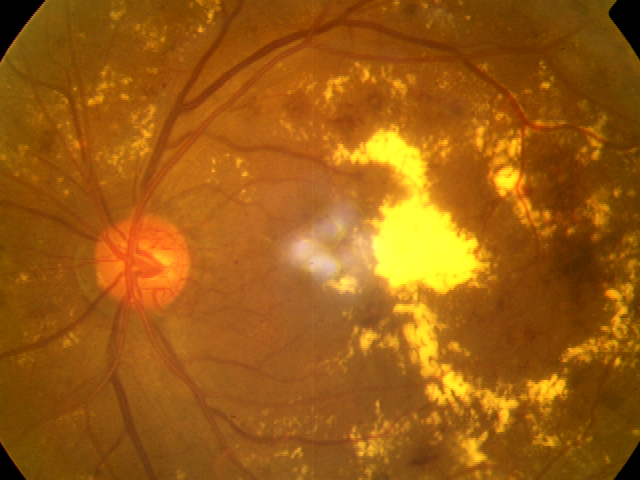

In [0]:
from google.colab.patches import cv2_imshow
show = cv2.imread('d2.png')
cv2_imshow(show)

In [0]:
testing = [join(image_dir, 'd2.png')]

In [0]:
testing = read_and_prep_images(testing)

In [0]:
testing = np.reshape(testing, (1,480,480,1))

In [0]:
model.predict(testing)

array([[0., 0., 0., 1., 0.]], dtype=float32)